Part 1

1.a

HMC focuses on real returns because they are adjusted for inflation, whereas nominal returns are not. This is important because it reflects the true increase in value of investments. For example, a nominal return of 2% would not mean much if inflation was 2% in the same period. On the other hand, a 2% real return would signify a genuine increase in the portfolio’s value or purchasing power by 2%. In addition, HMC stated that its goal for The Policy Portfolio was to “preserve the real value of the endowment and allow for some real growth” (Page 2). To achieve their preservation goal, HMC aims for an average real return of at least 3-4% annually (Page 2).

Using real returns in the mean-variance analysis alters the solution significantly and thus the perceived riskiness (variance) of an asset. Inputting nominal returns may overstate or exaggerate the expected returns during periods of high inflation, whereas real returns would reflect true economic gains, both of which may lead to completely different portfolio allocations. This is not a matter of scaling, because scaling typically refers to uniformly subtracting a constant inflation rate from each return in an asset class. For example, if the nominal returns of an asset class is 10% and the inflation rate is 2%, then the “real” return would be 8%.

1.b

Utilizing MV optimization for 1,000 securities is not preferable because the analysis relies heavily on estimates of returns, volatilities, and correlations. Thus, an increase in assets or estimations would lead to less reliable results since it increases the risk of errors and inaccuracy. Moreover, the additional complexity and computational resources required to optimize a larger number of assets may not justify the incremental reduction in portfolio risk due to diminishing marginal returns. In other words, it may not yield benefits that are proportional to the costs and time.

1.c

For the two-stage optimization approach to accurately approximate the MV optimization of all assets, the individual securities should have low correlation with one another to ensure that each one adds to the portfolio’s diversity. This is because effective diversification occurs when asset classes have sufficiently different behaviors. Another aspect that should be true is the asset class should behave similarly (like equities versus bonds) so that combining all the asset-class portfolios into one total optimized portfolio helps spread risk effectively and meaningfully.

1.d

Given its newness and unique characteristic of being dynamic to CPI values, TIPS likely has a low correlation with other asset classes and thus should be separated into a new asset class because of its independent movements. As a reminder, the original 11 asset classes within The Policy Portfolio are below (Page 6).

1. Domestic Equity
2. Foreign Equity
3. Emerging Markets
4. Private Equity
5. Absolute Return
6. High Yield
7. Commodities
8. Real Estate
9. Domestic Bonds
10. Foreign Bonds
11. Cash

Moreover, Exhibit 4 displays “Infl-Indexed Bonds” as a new asset class (Page 9). In a journal published by Portfolio Management Research, “the author maintains that TIPS should be evaluated as a separate and distinct asset class” because its sensitivity to inflation is distinct from traditional bonds.

2.a

Firstly, placing bounds or constraints on certain asset classes aims to manage risk with predefined parameters such as regulatory limits, risk tolerance levels, liquidity requirements, or other factors. Doing this means that HMC is not following the exact output of the MV optimization model, but instead tailors its portfolio allocation according to its specific goals and circumstances. As a reminder, here are the constraints set by HMC from both Exhibits 5 & 6:

| Constraint | 0%-Lower | 0%-Upper | 10%-Lower | 10%-Upper |
| --- | ---| --- | --- | --- |
| Domestic Equity | 0.00 | 1.00 | 22.0 | 42.0 |
| Foreign Equity | 0.00 | 1.00 | 5.0 | 25.0 |
| Emerging Markets | 0.00 | 1.00 | (1.0) | 19.0 |
| Private Equity | 0.00 | 1.00 | 5.0 | 25.0 |
| Absolute Return | 0.00 | 1.00 | (6.0) | 14.0 |
| High Yield | 0.00 | 1.00 | (8.0) | 12.0 |
| Commodities | 0.00 | 1.00 | (5.0) | 15.0 |
| Real Estate | 0.00 | 1.00 | (3.0) | 17.0 |
| Domestic Bonds | 0.00 | 1.00 | 1.0 | 21.0 |
| Foreign Bonds | 0.00 | 1.00 | (5.0) | 15.0 |
| Infl-Indexed Bonds | 0.00 | 1.00 | 0.00 | 100.0 |
| Cash | (0.50) | 1.00 | (15.0) | 5.0 |

2.b

The constraint is binding in the case of domestic equities and bonds because they likely have higher perceived risk or do not offer favorable returns relative to the other asset classes. The equities may have too high of volatility whereas the bonds may not offer sufficient yield or capital appreciation to meet the portfolio’s return objectives. In an unconstrained scenario, a portfolio would likely allocate capital to domestic equities and bonds if market conditions signaled favorable growth potential regardless of any risk tolerance.

2.c

When there was a change from 0% constraint to 10% constraint, the expected real returns remained the exactly the same. However, the Sharpe Ratio descreased from 0.38 to 0.35. Since this measures the risk-adjusted return, it signifies that each unit of risk generates slightly less return than before. Additionally, the standard deviation increase in all portfolio allocations. This indicates that there would be greater volatility and thus risk. These effects of tightening constraints imply that the overall portfolio risk may be reduced, but it comes at the cost of lower risk-adjusted returns and increased volatility.

Part 2

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings

#import the data
data_frame=pd.read_excel('/Users/luxueqi/Desktop/multi_asset_etf_data-2.xlsx',sheet_name='excess returns',index_col=0)
data_frame.head()

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
Date,,,,,,,,,,,
2009-04-30,0.008440,-0.001554,0.155029,0.114637,0.137906,-0.028005,0.295598,0.229649,0.022329,0.098793,-0.018505
2009-05-31,0.054143,0.163134,0.159871,0.132390,0.029026,-0.020302,0.023198,0.054364,0.028337,0.058925,0.020438
2009-06-30,0.004550,-0.026858,-0.023093,-0.014648,0.032919,-0.006170,-0.025461,0.044850,-0.004035,-0.001253,0.001383
2009-07-31,0.031311,0.018594,0.110173,0.100441,0.069217,0.008344,0.105826,0.143275,0.015352,0.074632,0.000905
2009-08-31,0.007192,-0.040800,-0.013571,0.044595,-0.017405,0.007199,0.131503,0.032977,-0.004586,0.036504,0.007978


In [33]:
#Question 1
df_mean=data_frame.mean()*12
df_std=data_frame.std()*(np.sqrt(12))
df_sr=df_mean/df_std
#Q1(a) mean and volatility
print(df_mean)
print(df_std)
#Q1(b) Sharpe ratios
print(df_sr)
print(np.sort(df_sr))
# we could see from the output: the best is SPY with 0.981; and the worst is BWX with -0.005

BWX   -0.004532
DBC    0.021884
EEM    0.064970
EFA    0.083817
HYG    0.062909
IEF    0.011250
IYR    0.122743
PSP    0.134369
QAI    0.019373
SPY    0.145133
TIP    0.020233
dtype: float64
BWX    0.085384
DBC    0.175468
EEM    0.194206
EFA    0.164818
HYG    0.088292
IEF    0.064291
IYR    0.189811
PSP    0.226988
QAI    0.050940
SPY    0.147890
TIP    0.051752
dtype: float64
BWX   -0.053080
DBC    0.124717
EEM    0.334541
EFA    0.508542
HYG    0.712512
IEF    0.174981
IYR    0.646659
PSP    0.591964
QAI    0.380306
SPY    0.981357
TIP    0.390955
dtype: float64
[-0.05307952  0.1247168   0.17498111  0.33454112  0.38030573  0.39095512
  0.50854171  0.59196426  0.64665885  0.71251193  0.98135651]


(3, 7)


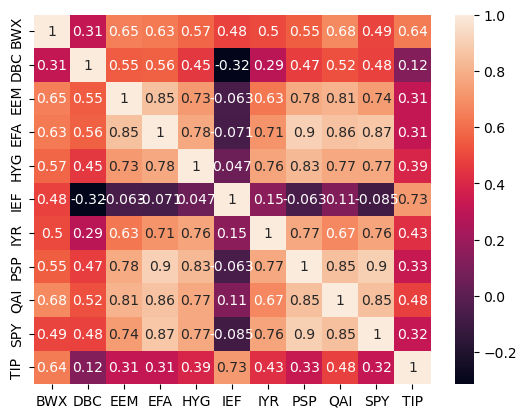

In [23]:
#Q2(a)
df_corr=data_frame.corr()
sns.heatmap(data_frame.corr(),annot=True);
#to avoid the correlation 1
df_corr[df_corr == 1] = 0
#since there're two 0.9, we can't spot the highest correlation directly from the graph
max_index = np.unravel_index(np.argmax(df_corr), df_corr.shape)
print(max_index)
#EFA & PSP has the highest correlation
#IEF & DBC has the lowest correlation

Q2(b)  TIPs(rankings from the lowest)：mean ranking 4/11; volatility ranking 2/11; Sharpe ranking 6/11. It has a lower variance but also with a lower mean. We could determine the overall performance by the sharpe ratio, which ranked in the middle. Comparing with IEF domestic and BWX foreign, which have the rankings 2/3/3 and 1/4/1 respectively, TIPs perform better. Since the mean values and sharpe ratio values of IEF and BWX are all lower than TIP, but volatility values are greater.

Q2(c) Based on the data, do TIPS seem to expand the investment opportunity set, implying that Harvard should consider them as a separate asset?

Based on the data, TIPS do not seem to expand the portfolios' diversitifcation significantly. A quick summary of the data is that TIP had the highest annualized return of 2% and lowest annualized volatility of 5%. Also, TIP had a stronger risk-adjusted return with the highest annualized Sharpe Ratio of 0.39. While these metrics are favorable compared to the other bonds, TIP has a strong positive correlation with both IEF (0.726) and BWX (0.638), meaning that they tend to move in similar directions. This suggests that a seperate asset class may not be justifiable because all three would react similarly to market conditions. Instead, TIPS should be added to an existing asset class to ensure more accurate risk management.

In [43]:
#Question 3
from numpy.linalg import inv,pinv
m=data_frame.mean()
I = np.ones(11)
cov=data_frame.cov()
C = I.T@pinv(cov)@I 
B = m@pinv(cov)@I
A = m@pinv(cov)@m
# minimum variance portfolio weights
w_g = (pinv(cov)@I)/C

#risk-free
rf=0

# weights for tangency portfolio
w_tan = (pinv(cov)@(m.T - rf*I))/(B-C*rf)

#function mv from 2023 repo
def mv_portfolio(mean_rets, cov_matrix, target=None):

    if target is None:
        return w_tan

    delta = (target - mean_rets @ w_g) / (mean_rets @ w_tan - mean_rets @ w_g)
    return delta * w_tan + (1 - delta) * w_g
w_t = mv_portfolio(m, cov)

#Q3(a)
w_tan_df = pd.DataFrame(w_t, index=data_frame.columns, columns=["Tangency Portfolio"])

display(
    w_tan_df.sort_values(by="Tangency Portfolio", ascending=False).style.format(
        "{:.2f}"
    )
)


# mean,volatility, and Sharpe ratio for weighted portfolio.
def performance(data_frame, w):
    w_tan_data_frame = data_frame @ w
    w_tan_df_mean=w_tan_data_frame.mean()*12
    w_tan_df_std=w_tan_data_frame.std()*(np.sqrt(12))
    w_tan_df_sr=w_tan_df_mean/w_tan_df_std
    print(w_tan_df_mean)
    print(w_tan_df_std)
    print(w_tan_df_sr)
performance(data_frame, w_tan_df)

,Tangency Portfolio
SPY,69.90
IEF,62.96
HYG,34.75
EEM,10.02
TIP,5.45
DBC,1.70
EFA,0.51
PSP,-11.53
IYR,-12.37
BWX,-46.26


Tangency Portfolio    8.812157
dtype: float64
Tangency Portfolio    5.293389
dtype: float64
Tangency Portfolio    1.664748
dtype: float64


In [45]:
#Q4(a)
w_mu=mv_portfolio(m, cov, target=0.0075)
w_mu_df = pd.DataFrame(w_mu, index=data_frame.columns, columns=["Target Portfolio"])

display(
    w_mu_df.sort_values(by="Target Portfolio", ascending=False).style.format(
        "{:.2f}"
    )
)
#Q4(b)
performance(data_frame, w_mu_df)

,Target Portfolio
IEF,0.68
SPY,0.62
HYG,0.51
TIP,0.21
EEM,0.03
EFA,0.02
DBC,0.01
QAI,-0.11
IYR,-0.14
PSP,-0.24


Target Portfolio    0.09
dtype: float64
Target Portfolio    0.061026
dtype: float64
Target Portfolio    1.474774
dtype: float64


Q4(c)  Discuss the allocation. In which assets is the portfolio most long? And short?

To identify which assets the portfolio is most long in, we can look at the data from both the Target and Tangency Portfolio columns. Assets with positive values are considered long positions (invested) and vise versa (sold short). Moreover, the higher the positive value, the larger the allocation of the portfolio's capital to that particular asset. Knowing this, the portfolio is the most long in IEF and SPY. IEF has substantial allocation in both portfolios with 62.959 in Tangency and 0.6777 in Target, which suggests a preference for U.S. 7-10 year treasury bonds and possibily stable returns that fixed income generally provides. Similarly, SPY has 69.901 in Tangency and 0.624 in Target, which suggests a bullish stands on the U.S. equity market and economic growth.

Conversely, the assets that are the most short are BWX and QAI by a large margin. BWX has the lowest allocation in Tangency at -46.264, and QAI has the lowest Tangency allocation at -114.131. Both positions may reflect a more negative outlook on international treasury bonds and alternative investments.

Q4(d)  Somewhat, but not exactly. Both SPY and IEF have the highest allocations and higher positive Sharpe Ratios, especially SPY with the highest of the entire portfolio. Given that the Sharpe Ratio represents the risk-adjusted returns, this makes sense given the portfolio's long investment in the ETF. As for the short positions in BWX and QAI, their Sharpe Ratios are both quite low, especially BWX with the only negative value. The small relation between the asset positions and their respective Sharpe Ratios indicate that risk-adjusted returns are strongly considered, but there is an additional strategy being used to justify the variance in each asset.

As learned in Lecture 1, this makes sense because returns (or Sharpe Ratio figures) are not the sole determining factor of allocation decisions. Rather, covariance plays a big role, which measures how assets move together based on their calculated correlation. In this case, IEF and SPY may have a strong covariance, meaning that their combined volatility may not reduce risk as much as expected.

In [47]:
#Q5(a)
#target return 0.0075, equally weighted:1/n
sum_column = (data_frame.mean()).sum()
w_eq=0.0075/sum_column
print(w_eq) # weight for all
arr = np.full((11, 1), w_eq)
performance(data_frame, arr)

0.13193626008124357
0    0.09
dtype: float64
0    0.15107
dtype: float64
0    0.595752
dtype: float64


In [49]:
#Q5(b)
w_rp=1/np.sqrt(data_frame.var())
#sum before scaling
asum=data_frame.mean() @ w_rp
w_rq=(0.0075/asum)*w_rp
#weight for "risk-parity"
print(w_rq)
performance(data_frame, w_rq)

BWX    0.219895
DBC    0.107003
EEM    0.096679
EFA    0.113917
HYG    0.212652
IEF    0.292042
IYR    0.098917
PSP    0.082716
QAI    0.368585
SPY    0.126957
TIP    0.362798
dtype: float64
0.09000000000000005
0.15495639269752
0.5808085644822865


Q5(c)  As for weights, the 'Equally weighted portfolio' and 'Risk-parity portfolio' are evenly distributed. The other two portfolios in above questions, especially the tangency portfolio, have larger range in their weights(i.e. greater difference in their weights), thus impling some assets matter much more than others. Then, for the general performance, the 'Equally weighted portfolio' and 'Risk-parity portfolio' have nearly the same mean, volatility and sharpe ratio. Moreover, the Tangency Portfolio has greater sharpe ratio than the 'equally weighted' and the 'risk-partiy'. The target one has lower variance, which also outperforms these two portfolios.

In [41]:
#Question 6
#dataframe without TIPs
updated_df = data_frame.drop('TIP', axis=1)

In [54]:
#compare to Q3
u_m=updated_df.mean()
u_I = np.ones(10)
u_cov=updated_df.cov()
u_C = u_I.T@pinv(u_cov)@u_I 
u_B = u_m@pinv(u_cov)@u_I
u_A = u_m@pinv(u_cov)@u_m
# Minimum Variance Portfolio Weights
u_w_g = (pinv(u_cov)@u_I)/u_C

#risk-free
rf=0

# Weights for Tangency Portfolio
u_w_tan = (pinv(u_cov)@(u_m.T - rf*u_I))/(u_B-u_C*rf)

#modify mv function:
def u_mv_portfolio(mean_rets, cov_matrix, target=None):

    if target is None:
        return u_w_tan

    delta = (target - mean_rets @ u_w_g) / (mean_rets @ u_w_tan - mean_rets @ u_w_g)
    return delta * u_w_tan + (1 - delta) * u_w_g
u_w_t = u_mv_portfolio(u_m, u_cov)

u_w_tan_df = pd.DataFrame(u_w_t, index=updated_df.columns, columns=["Tangency Portfolio(no TIP)"])

display(
    u_w_tan_df.sort_values(by="Tangency Portfolio(no TIP)", ascending=False).style.format(
        "{:.2f}"
    )
)

performance(updated_df, u_w_tan_df)

,Tangency Portfolio(no TIP)
SPY,270.60
IEF,255.36
HYG,133.86
EEM,38.92
DBC,8.03
EFA,0.27
PSP,-43.80
IYR,-47.27
BWX,-177.41
QAI,-437.57


Tangency Portfolio(no TIP)    33.933519
dtype: float64
Tangency Portfolio(no TIP)    20.39134
dtype: float64
Tangency Portfolio(no TIP)    1.664114
dtype: float64


After deleting TIPs, the sharpe ratio of Tangency Portfolio doesn't change significantly, which means it does not outerperform the original one. But meanwhile, the mean and variance increase a lot, so the Tangency Portfolio may have higher return but with higher risk.

In [53]:
#compare to Q4
u_w_mu=u_mv_portfolio(u_m, u_cov, target=0.0075)
u_w_mu_df = pd.DataFrame(u_w_mu, index=updated_df.columns, columns=["Target Portfolio(no TIP)"])

display(
    u_w_mu_df.sort_values(by="Target Portfolio(no TIP)", ascending=False).style.format(
        "{:.2f}"
    )
)

performance(updated_df, u_w_mu_df)

,Tangency Portfolio
IEF,0.81
SPY,0.64
HYG,0.51
EEM,0.03
DBC,0.03
EFA,0.01
QAI,-0.06
IYR,-0.14
PSP,-0.23
BWX,-0.59


Tangency Portfolio    0.09
dtype: float64
Tangency Portfolio    0.061288
dtype: float64
Tangency Portfolio    1.468482
dtype: float64


The values of mean, volatility, and sharpe ratio all remain(or say, change slightly). So dropping TIPs wouldn't affect the original performance.